In [1]:
import pandas as pd
import quandl

df = quandl.get('WIKI/GOOGL')

print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [2]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['High_Low_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0 # High Low %
df['Percent_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0 # % change in stock prices

df = df[['Adj. Close', 'High_Low_PCT', 'Percent_Change', 'Adj. Volume']] # We only care about these features.

print(df.head())

            Adj. Close  High_Low_PCT  Percent_Change  Adj. Volume
Date                                                             
2004-08-19   50.322842      3.712563        0.324968   44659000.0
2004-08-20   54.322689      0.710922        7.227007   22834300.0
2004-08-23   54.869377      3.729433       -1.227880   18256100.0
2004-08-24   52.597363      6.417469       -5.726357   15247300.0
2004-08-25   53.164113      1.886792        1.183658    9188600.0


In [3]:
import math

forecast_column = 'Adj. Close'
# To not waste data, we provide features with any null values with some outlier like -112233
df.fillna(-112233, inplace=True) # na means not available, used to fill NaN/nan values
how_many_days = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_column].shift(-how_many_days)

print(df.head())

            Adj. Close  High_Low_PCT  Percent_Change  Adj. Volume      label
Date                                                                        
2004-08-19   50.322842      3.712563        0.324968   44659000.0  69.078238
2004-08-20   54.322689      0.710922        7.227007   22834300.0  67.839414
2004-08-23   54.869377      3.729433       -1.227880   18256100.0  68.912727
2004-08-24   52.597363      6.417469       -5.726357   15247300.0  70.668146
2004-08-25   53.164113      1.886792        1.183658    9188600.0  71.219849


In [4]:
import numpy as np
from sklearn import preprocessing #for scaling data
from sklearn.model_selection import train_test_split # for training and testing samples, splitting, shuffling
from sklearn import svm # can use for regression
from sklearn.linear_model import LinearRegression

X = np.array(df.drop(['label'], axis=1)) # this 1 is axis, tells that we need to drop a 'column' named label

"""The preprocessing.scale() algorithm puts your data on one scale. 
This is helpful with largely sparse datasets. In simple words, your data is vastly spread out. 
For example the values of X maybe like so:

X = [1, 4, 400, 10000, 100000]

The issue with sparsity is that it very biased or in statistical terms skewed. 
So, therefore, scaling the data brings all your values onto one scale eliminating the sparsity."""

X = preprocessing.scale(X)
X_lately = X[-how_many_days:]
X = X[:-how_many_days]
# X = X[:-forecast_out+1]
df.dropna(inplace=True)
y = np.array(df['label'])

print(len(X), len(y))

3389 3389


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression() # parameter n_jobs is 1 by default. Can increase to make it run faster: parallelism 
# can use n_jobs=-1 to make the most of what your processor can do.
clf.fit(X_train, y_train)

# pickling: good to have at disposal. pickle helps with serialization of a python object
import pickle # used to save. We normally save after training data (fit) because that's the most tedious step

# clf.fit(X_train, y_train): Used after this
with open('LinearRegression.pickle', 'wb') as f:
    pickle.dump(clf, f)
    
# To use the pickle files again
pickle_in = open('LinearRegression.pickle', 'rb')
clf = pickle.load(pickle_in)

accuracy = clf.score(X_test, y_test)

# print(accuracy)

In [6]:
stock_prediction = clf.predict(X_lately)

for i in range(how_many_days):
    print('Day {0} prediction: {1}'.format(i+1, stock_prediction[i]))
    
print('\nAccuracy: {0}'.format(accuracy*100))

Day 1 prediction: 1103.7964986716827
Day 2 prediction: 1073.173029689525
Day 3 prediction: 1020.0384427039558
Day 4 prediction: 1061.998858357853
Day 5 prediction: 1073.859892485616
Day 6 prediction: 1074.2151552536247
Day 7 prediction: 1093.0317853124025
Day 8 prediction: 1112.0987006532398
Day 9 prediction: 1115.3345754777952
Day 10 prediction: 1123.5440765071774
Day 11 prediction: 1132.836354905381
Day 12 prediction: 1129.9927826002838
Day 13 prediction: 1149.5675852734657
Day 14 prediction: 1165.2428306335833
Day 15 prediction: 1136.5683045701178
Day 16 prediction: 1122.8799735667567
Day 17 prediction: 1088.5369007561944
Day 18 prediction: 1104.3082627048238
Day 19 prediction: 1115.223058129196
Day 20 prediction: 1121.901526669099
Day 21 prediction: 1136.0948302515737
Day 22 prediction: 1150.6262257863775
Day 23 prediction: 1182.2485689699638
Day 24 prediction: 1186.5280231204972
Day 25 prediction: 1158.2473633859927
Day 26 prediction: 1169.4404834314628
Day 27 prediction: 1171.268

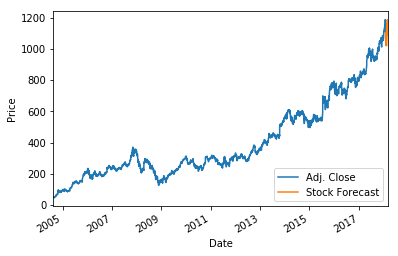

In [7]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

df['Stock Forecast'] = np.nan

last_date = df.iloc[-1].name # name of last date in dataset
last_date_unix = last_date.timestamp()
one_day_seconds = 86400
next_date_unix = last_date_unix + one_day_seconds

for i in stock_prediction:
    next_date = datetime.datetime.fromtimestamp(next_date_unix)
    next_date_unix += one_day_seconds
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Adj. Close'].plot()
df['Stock Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()